In [5]:
%matplotlib inline
import pandas as pd
import os

PARQA = os.getenv('PARQA')

In [6]:
calls = pd.read_csv(PARQA + 'data/311/MatchedCalls.cav', index_col=0)
calls['year'] = calls['Created Date'].apply(lambda x: int(x.split(' ')[0].split('/')[-1]))
# calls['boro'] = calls['parkDistrict'].apply(lambda x: x.split('-')[0])

In [7]:
ts = calls[['year','parkDistrict']].groupby(['parkDistrict','year']).size().unstack()
ts.shape

/Users/casy/anaconda/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


(72, 6)

In [8]:
ts.to_csv(PARQA + '/parqa/311/TIMESERIES/311_timeseries.csv')

In [9]:
ts.head(3)

year,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,363,353,374,397,564,619
B-02,339,396,282,463,566,614
B-03,251,252,263,241,270,447


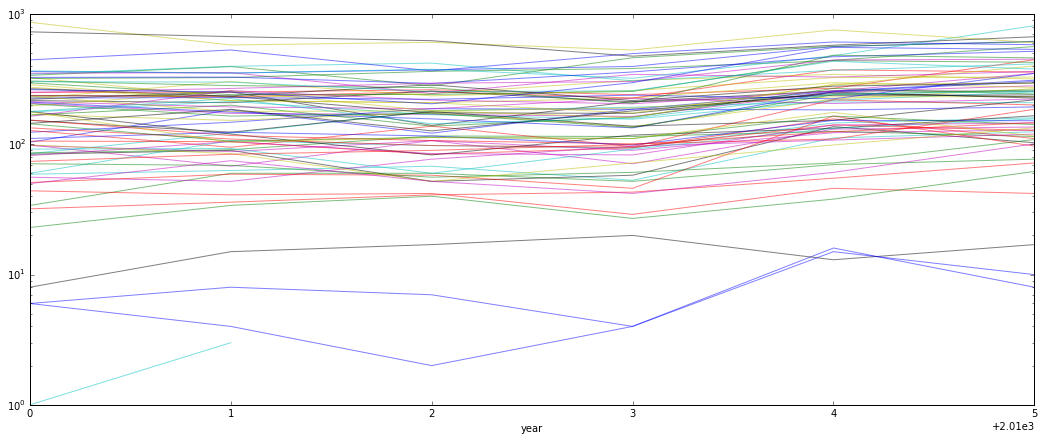

In [10]:
ts.transpose().plot( figsize=(18,7), legend=0, alpha=.5,logy=1);

In [11]:
calls['Complaint Type'].value_counts()

Maintenance or Facility          57676
Violation of Park Rules          10866
Animal in a Park                 10196
Damaged Tree                      3870
DPR Internal                      3310
Illegal Tree Damage               1494
Overgrown Tree/Branches            770
Dead Tree                          608
Root/Sewer/Sidewalk Condition      184
Name: Complaint Type, dtype: int64

In [12]:
ts_m = calls[calls['Complaint Type']=='Maintenance or Facility'][['year','parkDistrict']].groupby(['parkDistrict','year']).size().unstack()


In [13]:
ts_m.to_csv(PARQA + '/parqa/311/TIMESERIES/311_timeseries_maintenance.csv')
ts_m.head(2)

year,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,299,284,280,311,427,433
B-02,283,324,211,354,392,413


## Going deeper: types of complains about Maintenance

In [14]:
calls.Descriptor[calls['Complaint Type']=='Maintenance or Facility'].value_counts()

Structure - Outdoors     24214
Garbage or Litter        10052
Structure - Indoors       4584
Rodent Sighting           4105
Grass/Weeds               3186
Unsecured Facility        2891
Snow or Ice               2762
Hours of Operation        2617
Graffiti or Vandalism     2499
Broken Glass               766
Name: Descriptor, dtype: int64

In [15]:
p_calls = calls[(calls.Descriptor.isin(['Garbage or Litter','Broken Glass','Graffiti or Vandalism','Snow or Ice']))]

In [16]:
ts_p = p_calls.groupby(['parkDistrict','year']).size().unstack()
ts_p.to_csv(PARQA + '/parqa/311/TIMESERIES/311_timeseries_precize.csv')
ts_p.head(2)

year,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,102,85,93,102,156,131
B-02,78,78,32,81,137,94


## Only Littering

In [17]:
def saveTS(sdf,title='feature'):
    ts_l = sdf.groupby(['parkDistrict','year']).size().unstack()
    ts_l.to_csv(PARQA + '/parqa/311/TIMESERIES/311_timeseries_%s.csv' % title)
    ts_l.head(2)

In [18]:
l_calls = calls[calls.Descriptor=='Garbage or Litter']
saveTS(l_calls,title='litter')

In [19]:
g_calls = calls[calls.Descriptor=='Graffiti or Vandalism']
saveTS(g_calls,title='graphity')